### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score
from PreprocessingClass import Preprocessing_Data as pp

### Loading the dataset 🟩

In [2]:
income_data = pd.read_csv('data/adult.csv')

In [3]:
income_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Rename Columns 🟩

In [4]:
income_data.rename({'education.num':'education_num', 'marital.status':'marital_status', 'capital.gain':'capital_gain', 'capital.loss':'capital_loss', 'hours.per.week':'hours_per_week', 'native.country':'native_country'}, inplace=True, axis=1)

### Handling strange values (symbols) 🟩

In [5]:
pp.detected_symbols(income_data)

,index,count_symbols
1,workclass,1836.0
6,occupation,1843.0
13,native_country,583.0


In [6]:
income_data.replace('?', np.nan, inplace=True)

### Handling Missing Values 🟩

In [7]:
pp.detected_null_value(income_data, presentage_of_null=0, drop_rows=True)

drop rows in :  ['occupation', 'workclass', 'native_country']


,index,Counter,presentage of null value
6,occupation,1843,5.66
1,workclass,1836,5.64
13,native_country,583,1.79


### Handling Redundant Columns 🟩

In [8]:
pp.detected_redundant(income_data, 90, drop_columns=True).head(5)

redundant features:  ['capital_gain', 'capital_loss', 'native_country']
redundant features are dropped


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,<=50K


In [9]:
# income_data.drop(['capital_loss', 'capital_gain'], axis=1, inplace=True)
(income_data.eq('United-States').mean()*100).sort_values(ascending=False)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
hours_per_week    0.0
income            0.0
dtype: float64

### Splitting the dataset into the Training set and Validation set 🟩

In [51]:
income_data_train, income_data_vld = train_test_split(income_data, test_size=0.30, random_state=42)

In [52]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  hours_per_week  30162 non-null  int64 
 11  income          30162 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.0+ MB


### Encoding Categorical Data 🟩

In [53]:
ordinal_cats = income_data.select_dtypes(exclude=np.number).columns # 'native_country'
income_data_train, income_data_vld  = pp.encoding_ordinal_cat(ordinal_cats, income_data_train, income_data_vld)

In [54]:
income_data_train = income_data.select_dtypes(include=np.number).merge(income_data_train, how='inner', left_index=True, right_index=True)

In [55]:
income_data_vld = income_data.select_dtypes(include=np.number).merge(income_data_vld, how='inner', left_index=True, right_index=True)

In [56]:
income_data_train

,age,fnlwgt,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,income
1,82,132870,9,18,3,11,4,11,3,4,1,0
3,54,140359,4,40,2,15,4,3,3,4,0,0
4,41,264663,10,40,2,1,0,11,4,4,1,0
5,34,216864,9,45,2,15,2,2,0,4,1,1
6,38,150601,6,40,2,9,2,11,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21108,30,183284,13,50,2,15,4,12,1,4,0,0
21109,46,109227,10,70,5,12,4,9,1,4,1,0
21110,34,118551,13,40,2,9,4,11,1,4,0,0
21111,39,163057,10,99,2,9,4,3,1,4,1,0


### Handling Imbalanced Data 🟩

In [57]:
from imblearn.over_sampling import ADASYN

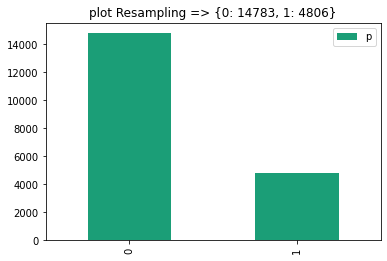

In [58]:
income_data_train.income.value_counts().plot(kind='bar', cmap='Dark2')
plt.title('plot Resampling => '+str(income_data_train.income.value_counts().to_dict()))
plt.legend('plot before')

In [59]:
# SMOTE
income_data_X, income_data_y = ADASYN(random_state=42, sampling_strategy='auto').fit_resample(income_data_train.drop('income', axis=1), income_data_train['income'])
# income_data_train = pd.DataFrame(income_data_X, columns=income_data.drop('income', axis=1).columns).merge(income_data_y, how='inner', left_index=True, right_index=True)
income_data_train = pd.concat([income_data_X, income_data_y], axis=1)

In [60]:
income_data_train

,age,fnlwgt,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,income
0,82,132870,9,18,3,11,4,11,3,4,1,0
1,54,140359,4,40,2,15,4,3,3,4,0,0
2,41,264663,10,40,2,1,0,11,4,4,1,0
3,34,216864,9,45,2,15,2,2,0,4,1,1
4,38,150601,6,40,2,9,2,11,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29939,42,196701,9,42,2,15,2,2,1,4,0,1
29940,42,194677,12,48,2,12,3,7,0,4,0,1
29941,53,194828,12,48,4,9,2,3,0,4,1,1
29942,37,208358,9,40,2,11,2,0,5,4,0,1


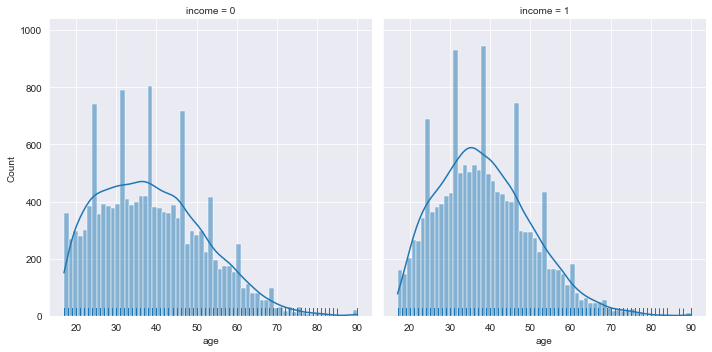

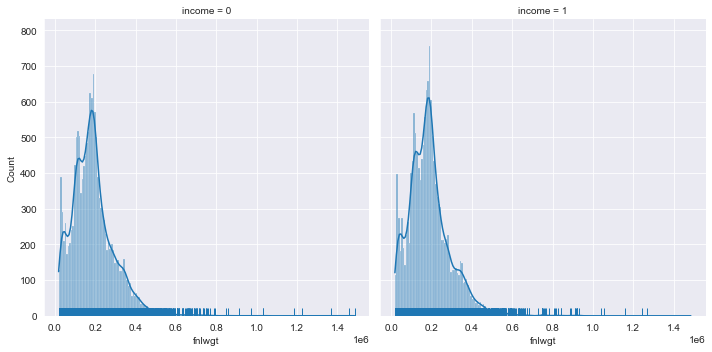

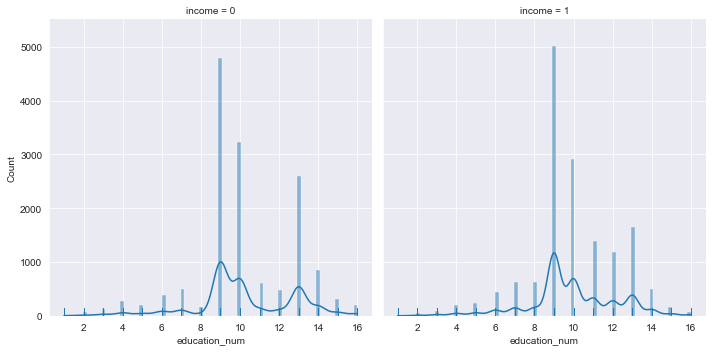

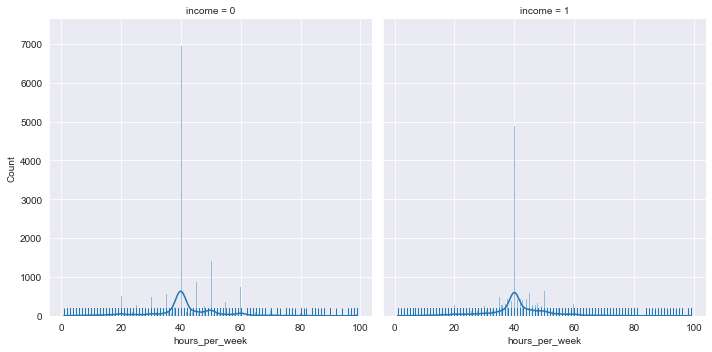

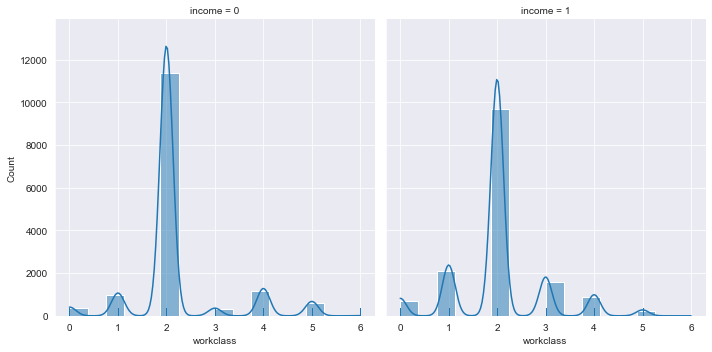

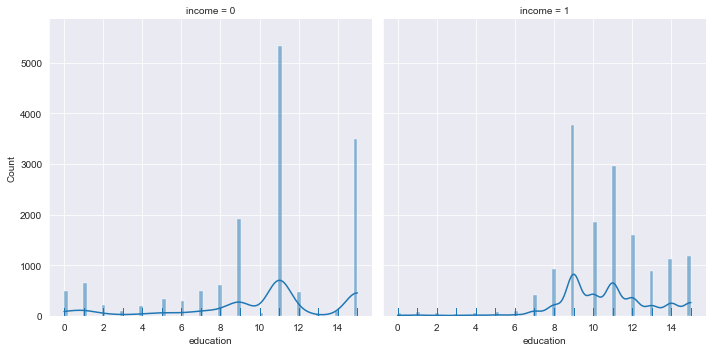

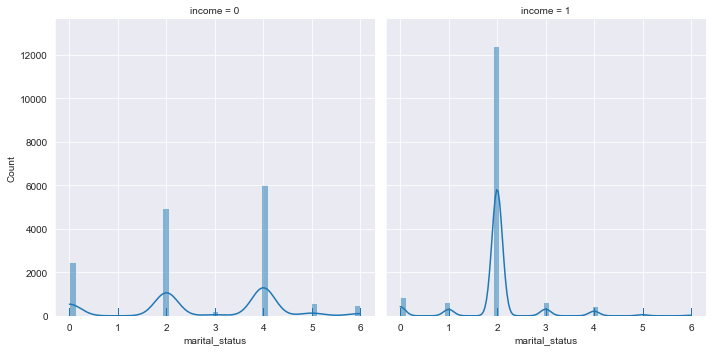

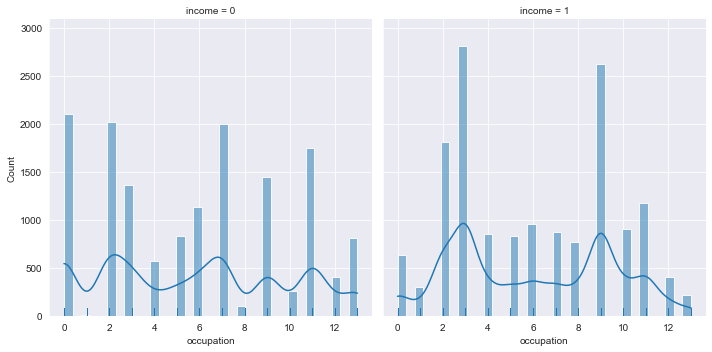

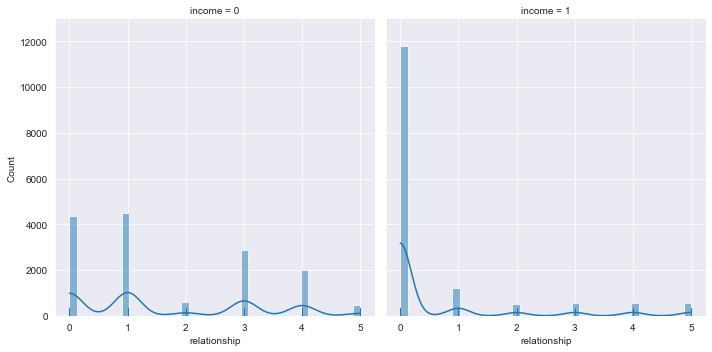

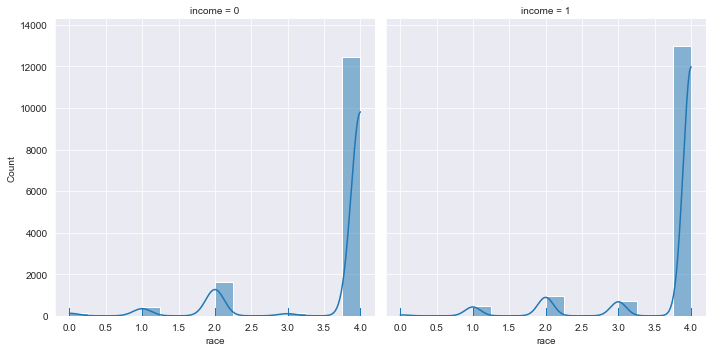

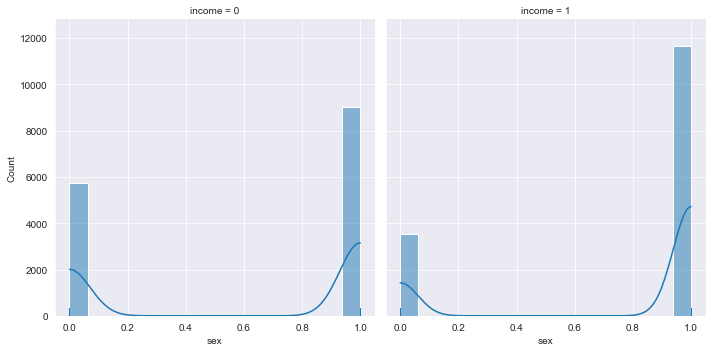

In [61]:
sns.set_style('darkgrid')
for i in income_data_train.columns[:-1]:
  sns.displot(data= income_data_train, x=i,  kind='hist', palette='set3', kde=True, col='income', rug=True)
  plt.show()

In [62]:
# help(ADASYN)

### Handling Highly Correlated Features 🟩

In [63]:
pp.detected_highly_corr(df=income_data_train, target_name=income_data_train.columns[-1], threshold=70)

[]

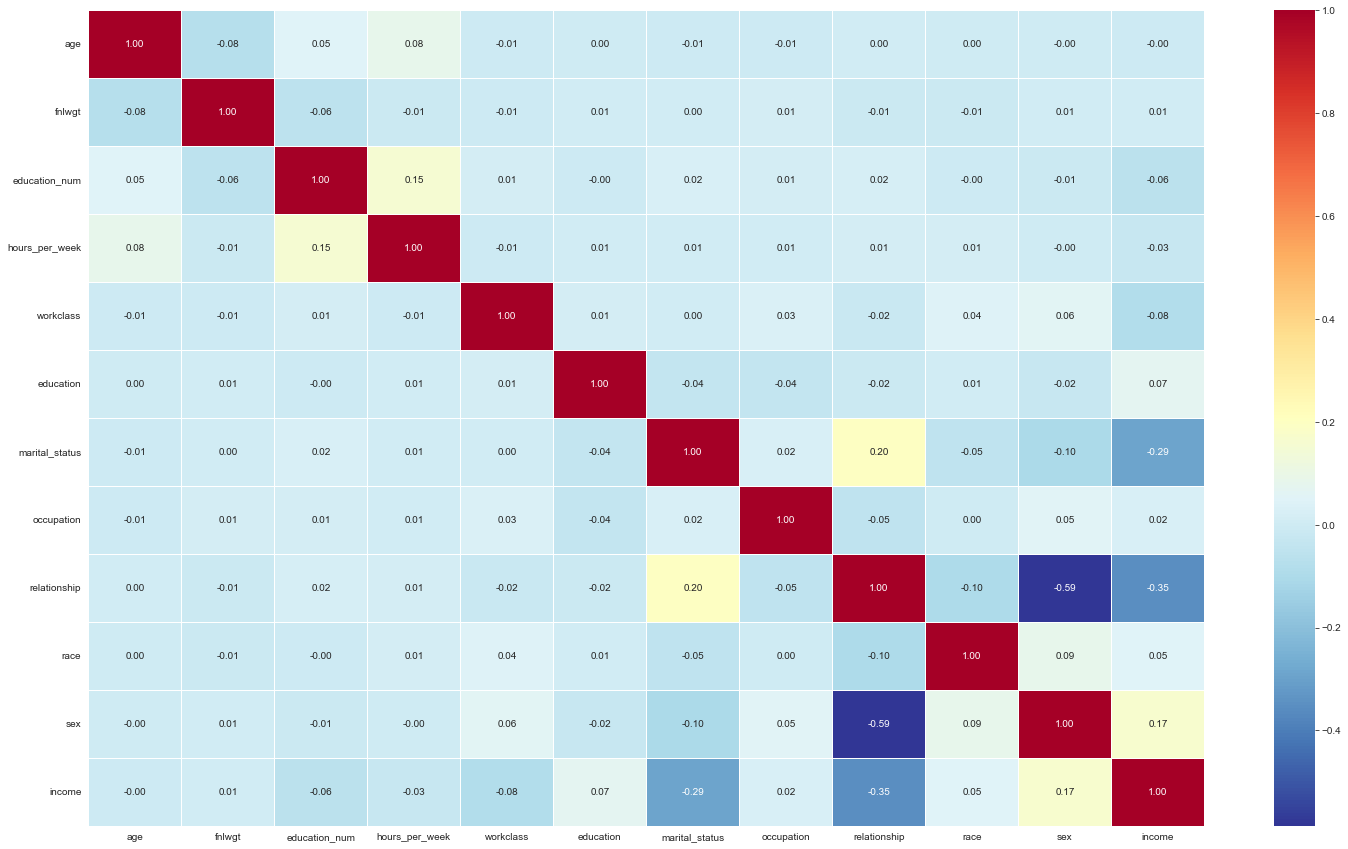

In [64]:
plt.figure(figsize=(25, 15))
sns.heatmap(income_data_train.corr(), annot=True, linewidths=0.5, fmt='.2f', cmap='RdYlBu_r');

In [67]:
income_data_train.corr()['income'].abs().sort_values(ascending=False)

income            1.000000
relationship      0.353470
marital_status    0.289953
sex               0.169924
workclass         0.084495
education         0.069232
education_num     0.064235
race              0.047901
hours_per_week    0.025762
occupation        0.023205
fnlwgt            0.006931
age               0.004646
Name: income, dtype: float64

### Handling Outliers 🟩

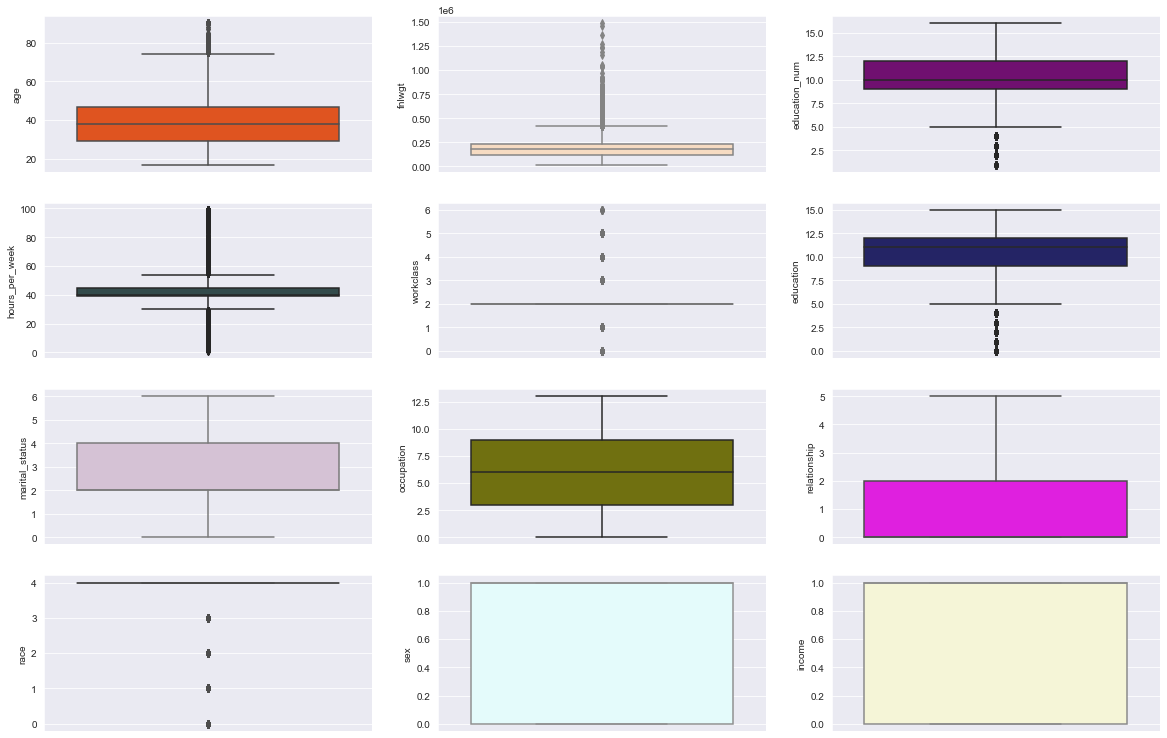

In [66]:
# clamp the outliers
pp.boxplot(income_data_train, figsize=(20, 20))

In [22]:
# out_col = ['hours_per_week', 'education_num', 'fnlwgt']
# income_data_train[out_col] = pp.detected_outliers(income_data_train[out_col], threshold=3, clampping=True)

### Skewness Handling 🟩

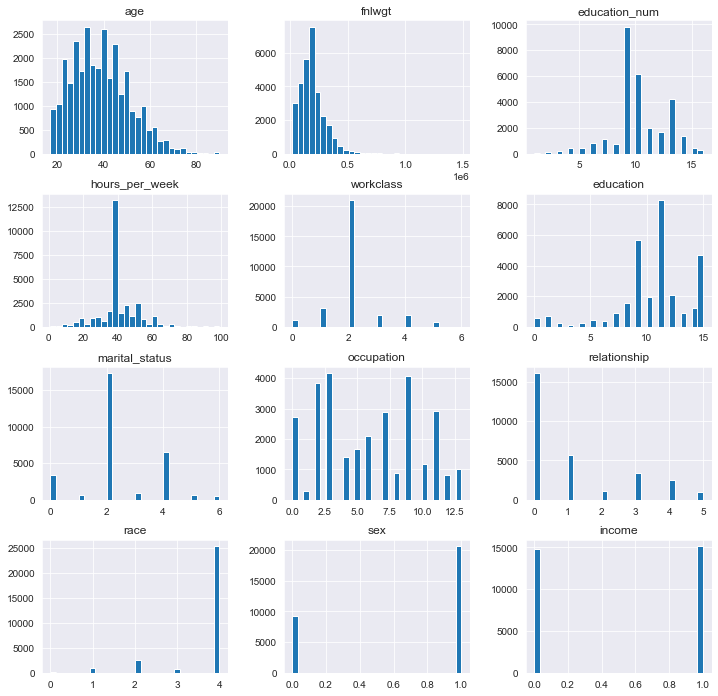

In [68]:
pp.histplot(income_data_train)

In [74]:
# from scipy.stats import boxcox

for col in income_data_train.columns[:-1]:
    if abs(income_data_train[col].skew()) >= 1:
        income_data_train[col] = np.log(1 + income_data_train[col])

In [75]:
income_data_train.skew().abs().sort_values(ascending=False)

race              3.291549
education         0.979561
workclass         0.957179
fnlwgt            0.845291
sex               0.824317
relationship      0.682435
age               0.531619
hours_per_week    0.309440
marital_status    0.308171
education_num     0.246814
occupation        0.109381
income            0.025250
dtype: float64

### Min-max scale the non-gaussian features, and standardize the gaussian features 🟩

In [76]:
X_train = income_data_train.iloc[:, :-1]
y_train = income_data_train.iloc[:, -1]

X_vld = income_data_vld.iloc[:, :-1]
y_vld = income_data_vld.iloc[:, -1]

In [77]:
X_train, X_vld = pp.scaling(X_train, X_vld, scaling_type='minmax')

### Modeling 🟩

##### KNN 🟩

In [85]:
knn_para = {'n_neighbors': [5, 10, 20, 30, 40, 50], 'weights': ['uniform', 'distance'], 'p': [1, 2], 'metric': ['minkowski']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_para, scoring='f1', cv=5, verbose=1)
grid.fit(X_train, y_train)
print('Best Parameters: ', grid.best_params_)
print('Best Score: ', grid.best_score_)
print('f1 Score: ', f1_score(y_vld, grid.predict(X_vld), average='micro'))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:  {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score:  0.8308816863592134
f1 Score:  0.7777379672757674


In [86]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1, metric='minkowski')
knn.fit(X_train, y_train)

print('KNN F1 Score: ', f1_score(y_vld, knn.predict(X_vld), average='micro'))

KNN F1 Score:  0.7777379672757674


#### Decision Tree 🟩

In [87]:
tree_para = {'min_samples_split': [3, 6, 10], 'min_samples_leaf': [3, 6, 10], 'max_depth': [3, 6, 10], 'max_features': [0.6, 0.7, 0.9], 'max_leaf_nodes': [3, 6, 10], 'ccp_alpha': [0.001, 0.01, 0.1, 0.6, 0.9]}
tree_grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=2022), param_grid=tree_para, scoring='f1', cv=5, verbose=1)
tree_grid.fit(X_train, y_train)
print('Best Parameters: ', tree_grid.best_params_)
print('Best Score: ', tree_grid.best_score_)
print('f1 Score: ', f1_score(y_vld, tree_grid.predict(X_vld), average='micro'))

Fitting 5 folds for each of 1215 candidates, totalling 6075 fits
Best Parameters:  {'ccp_alpha': 0.001, 'max_depth': 3, 'max_features': 0.9, 'max_leaf_nodes': 6, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best Score:  0.8263915157168915
f1 Score:  0.7366535292010034


In [89]:
tree = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3, max_features=0.9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=3, class_weight='balanced', random_state=2022)
tree.fit(X_train, y_train)
print('Tree F1 Score: ', f1_score(y_vld, tree.predict(X_vld), average='micro'))

Tree F1 Score:  0.7366535292010034


In [90]:
pd.DataFrame(tree.predict(X_vld)).value_counts()

0    4779
1    3594
dtype: int64

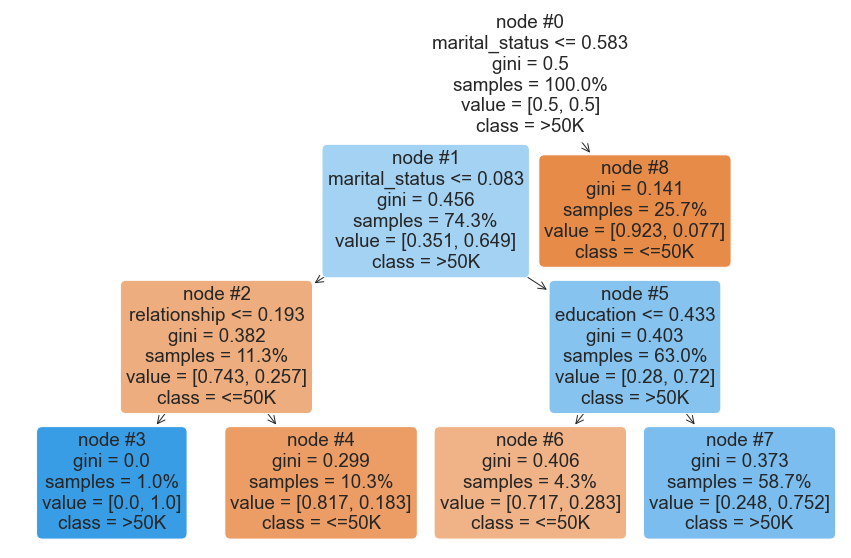

In [91]:
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, rounded=True, class_names=['<=50K', '>50K'], impurity = True, node_ids = True, proportion = True, feature_names=income_data_train.columns[:-1]);

#### Random Forest 🟩 

In [92]:
forest_para = {'n_estimators': [5, 10, 50, 60, 80, 90, 100], 'max_samples': [0.6, 0.8, 0.95], 'bootstrap': [True]}

forest_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=2022), param_grid=forest_para, scoring='f1', cv=5, verbose=1)

forest_grid.fit(X_train, y_train)
print('Best Parameters: ', forest_grid.best_params_)
print('Best Score: ', forest_grid.best_score_)
print('f1 Score: ', f1_score(y_vld, forest_grid.predict(X_vld), average='micro'))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best Parameters:  {'bootstrap': True, 'max_samples': 0.95, 'n_estimators': 80}
Best Score:  0.8395390244336227
f1 Score:  0.7820375014928939


In [99]:
forest = RandomForestClassifier(n_estimators=80, bootstrap=True, max_samples=0.90, class_weight='balanced', random_state=2022)
forest.fit(X_train, y_train)
print('Tree F1 Score: ', f1_score(y_vld, forest.predict(X_vld), average='micro'))

Tree F1 Score:  0.7893228233608026


#### Decision Tree without Scaling 🟩

In [100]:
X_train_nScale = income_data_train.iloc[:, :-1]
y_train_nScale = income_data_train.iloc[:, -1]

X_vld_nScale = income_data_vld.iloc[:, :-1]
y_vld_nScale = income_data_vld.iloc[:, -1]

In [101]:
tree_para = {'min_samples_split': [3, 6, 10], 'min_samples_leaf': [3, 6, 10], 'max_depth': [3, 6, 10], 'max_features': [0.5, 0.7, 0.9], 'max_leaf_nodes': [3, 6, 10], 'ccp_alpha': [0.001, 0.01, 0.1, 0.6, 0.9]}
tree_grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=2022), param_grid=tree_para, scoring='f1', cv=5, verbose=1)

tree_grid.fit(X_train_nScale, y_train_nScale)
print('Best Parameters: ', tree_grid.best_params_)
print('Best Score: ', tree_grid.best_score_)

print('f1 Score: ', f1_score(y_vld_nScale, tree_grid.predict(X_vld_nScale), average='micro'))

Fitting 5 folds for each of 1215 candidates, totalling 6075 fits
Best Parameters:  {'ccp_alpha': 0.001, 'max_depth': 3, 'max_features': 0.9, 'max_leaf_nodes': 6, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best Score:  0.8263915157168915
f1 Score:  0.7366535292010034


#### Scaling with decision tree not effectively,,